In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Params

In [2]:
site_labels = ['EC', 'FR', 'GCN']

In [3]:
param_dicts = {}
# site	pgerm	fmean	fvar	wA	    wB
# FR	0.165	1.306	1.403	1.453	0.547
# EC	0.224	2.858	23.513	1.848	0.152
# GCN	0.227	2.097	13.746	1.884	0.116

In [4]:
param_dicts['FR'] = {
    'fits': ['fs', 'fd'],
    'envs': ['es', 'ed'],
    'germs': ['gs', 'gd'],
    'hards': ['hs', 'ss'],
    'pA': [0, 0.25, 0.5, 0.75, 1],
    'pGermBH': [0.165],
    'pGermWT': [0.165, 0.5, 0.75, 1],
    'bankLength': [3, 5, 7],
    'fMean': [1.306],
    'fVar': [1.403],
    'wA': [1.453],
    'wB': [0.547],
    'site': ['FR']
}

In [5]:
param_dicts['EC'] = {
    'fits': ['fs', 'fd'],
    'envs': ['es', 'ed'],
    'germs': ['gs', 'gd'],
    'hards': ['hs', 'ss'],
    'pA': [0, 0.25, 0.5, 0.75, 1],
    'pGermBH': [0.224],
    'pGermWT': [0.224, 0.5, 0.75, 1],
    'bankLength': [3, 5, 7],
    'fMean': [2.858],
    'fVar': [23.513],
    'wA': [1.848],
    'wB': [0.152],
    'site': ['EC']
}

In [6]:
param_dicts['GCN'] = {
    'fits': ['fs', 'fd'],
    'envs': ['es', 'ed'],
    'germs': ['gs', 'gd'],
    'hards': ['hs', 'ss'],
    'pA': [0, 0.25, 0.5, 0.75, 1],
    'pGermBH': [0.227],
    'pGermWT': [0.227, 0.5, 0.75, 1],
    'bankLength': [3, 5, 7],
    'fMean': [2.097],
    'fVar': [13.746],
    'wA': [1.884],
    'wB': [0.116],
    'site': ['GCN']
}

### Load data

In [7]:
data_dir = '../data/'
!pwd

/Users/yinzheng/Documents/GitHub/bethedging_stochastic/analysis


In [30]:
df_EC_ab = pd.read_csv(data_dir + 'EC_ab/data_maxn=1000.csv')
df_FR_ab = pd.read_csv(data_dir + 'FR_ab/data_maxn=1000.csv')
df_GCN_ab = pd.read_csv(data_dir + 'GCN_ab/data_maxn=1000.csv')
df_EC_dist = pd.read_csv(data_dir + 'EC_dist/data_maxn=1000.csv')
df_FR_dist = pd.read_csv(data_dir + 'FR_dist/data_maxn=1000.csv')
df_GCN_dist = pd.read_csv(data_dir + 'GCN_dist/data_maxn=1000.csv')
# sort by N
df_EC_ab = df_EC_ab.sort_values(by='N')
df_FR_ab = df_FR_ab.sort_values(by='N')
df_GCN_ab = df_GCN_ab.sort_values(by='N')
df_EC_dist = df_EC_dist.sort_values(by='N')
df_FR_dist = df_FR_dist.sort_values(by='N')
df_GCN_dist = df_GCN_dist.sort_values(by='N')

In [31]:
df_EC_ab['hards'].unique()

array(['hs'], dtype=object)

In [32]:
# clean dfs so that each row has unique pgermbh, pgermWt, bankLength, fmean, fvar
df_EC_dist = df_EC_dist.drop_duplicates(subset=['N', 'fits', 'germs', 'hards', 'pGermBH', 'pGermWT', 'bankLength', 'fmean', 'fvar'])
df_FR_dist = df_FR_dist.drop_duplicates(subset=['N', 'fits', 'germs', 'hards', 'pGermBH', 'pGermWT', 'bankLength', 'fmean', 'fvar'])
df_GCN_dist = df_GCN_dist.drop_duplicates(subset=['N', 'fits', 'germs', 'hards', 'pGermBH', 'pGermWT', 'bankLength', 'fmean', 'fvar'])

In [33]:
site_model_df_dict = {}
site_model_df_dict['EC_ab'] = df_EC_ab
site_model_df_dict['FR_ab'] = df_FR_ab
site_model_df_dict['GCN_ab'] = df_GCN_ab
site_model_df_dict['EC_dist'] = df_EC_dist
site_model_df_dict['FR_dist'] = df_FR_dist
site_model_df_dict['GCN_dist'] = df_GCN_dist

In [34]:
df_EC_ab['hards'].unique()

array(['hs'], dtype=object)

### Plotting functions

In [35]:
def plot_npfix(df, var_name, var_vals, title, save=False, log=True):
    # plot NPfix vs N for each value of var_name
    fig, ax = plt.subplots(dpi=300, figsize=(6, 4))
    for val in var_vals:
        sub_df = df[df[var_name] == val]
        ax.plot(sub_df['N'], sub_df['NPfix'], label=val)
    # add horizontal line for neutral
    ax.axhline(y=1, color='black', linestyle='--')
    ax.set_xscale('log')
    if log:
        ax.set_yscale('log')
    ax.set_xlabel('N')
    ax.set_ylabel('NPfix')
    ax.set_title(title.replace('_', ' '))
    ax.legend(title=var_name)
    if save:
        plt.savefig(title + '.png')
    plt.show()

In [36]:
def filter_df(df, vars_dict):
    for key in vars_dict:
        df = df[df[key] == vars_dict[key]]
    return df

In [37]:
def filter_dict_by_model(params, filter_params, model):
    res_params = {}
    res_params['hards'] = params['hards']
    res_params['pGermWT'] = params['pGermWT']
    res_params['bankLength'] = params['bankLength']
    if model == 'ab':
        res_params['pA'] = params['pA']
    elif model == 'dist':
        res_params['fits'] = params['fits']
    return res_params

### Plot Params

EC_ab


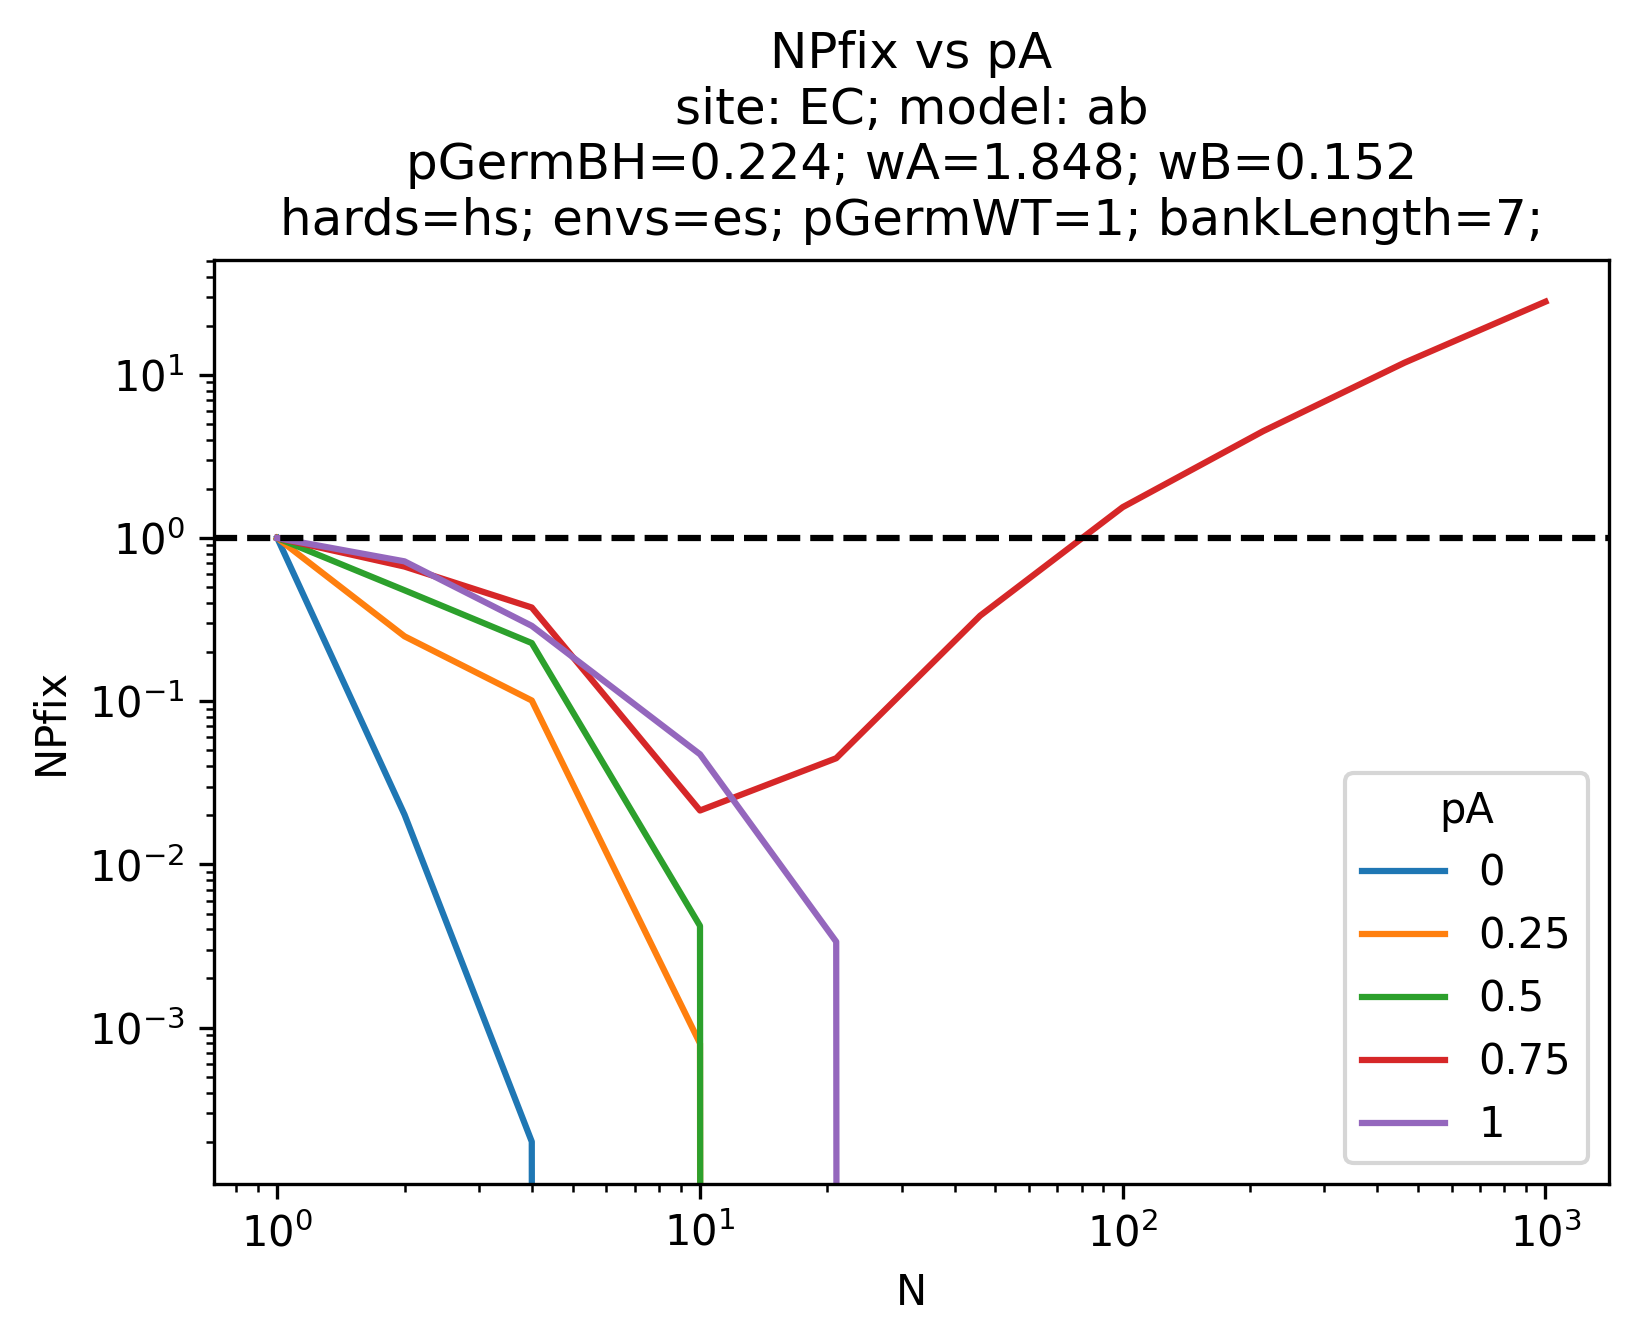

FR_ab


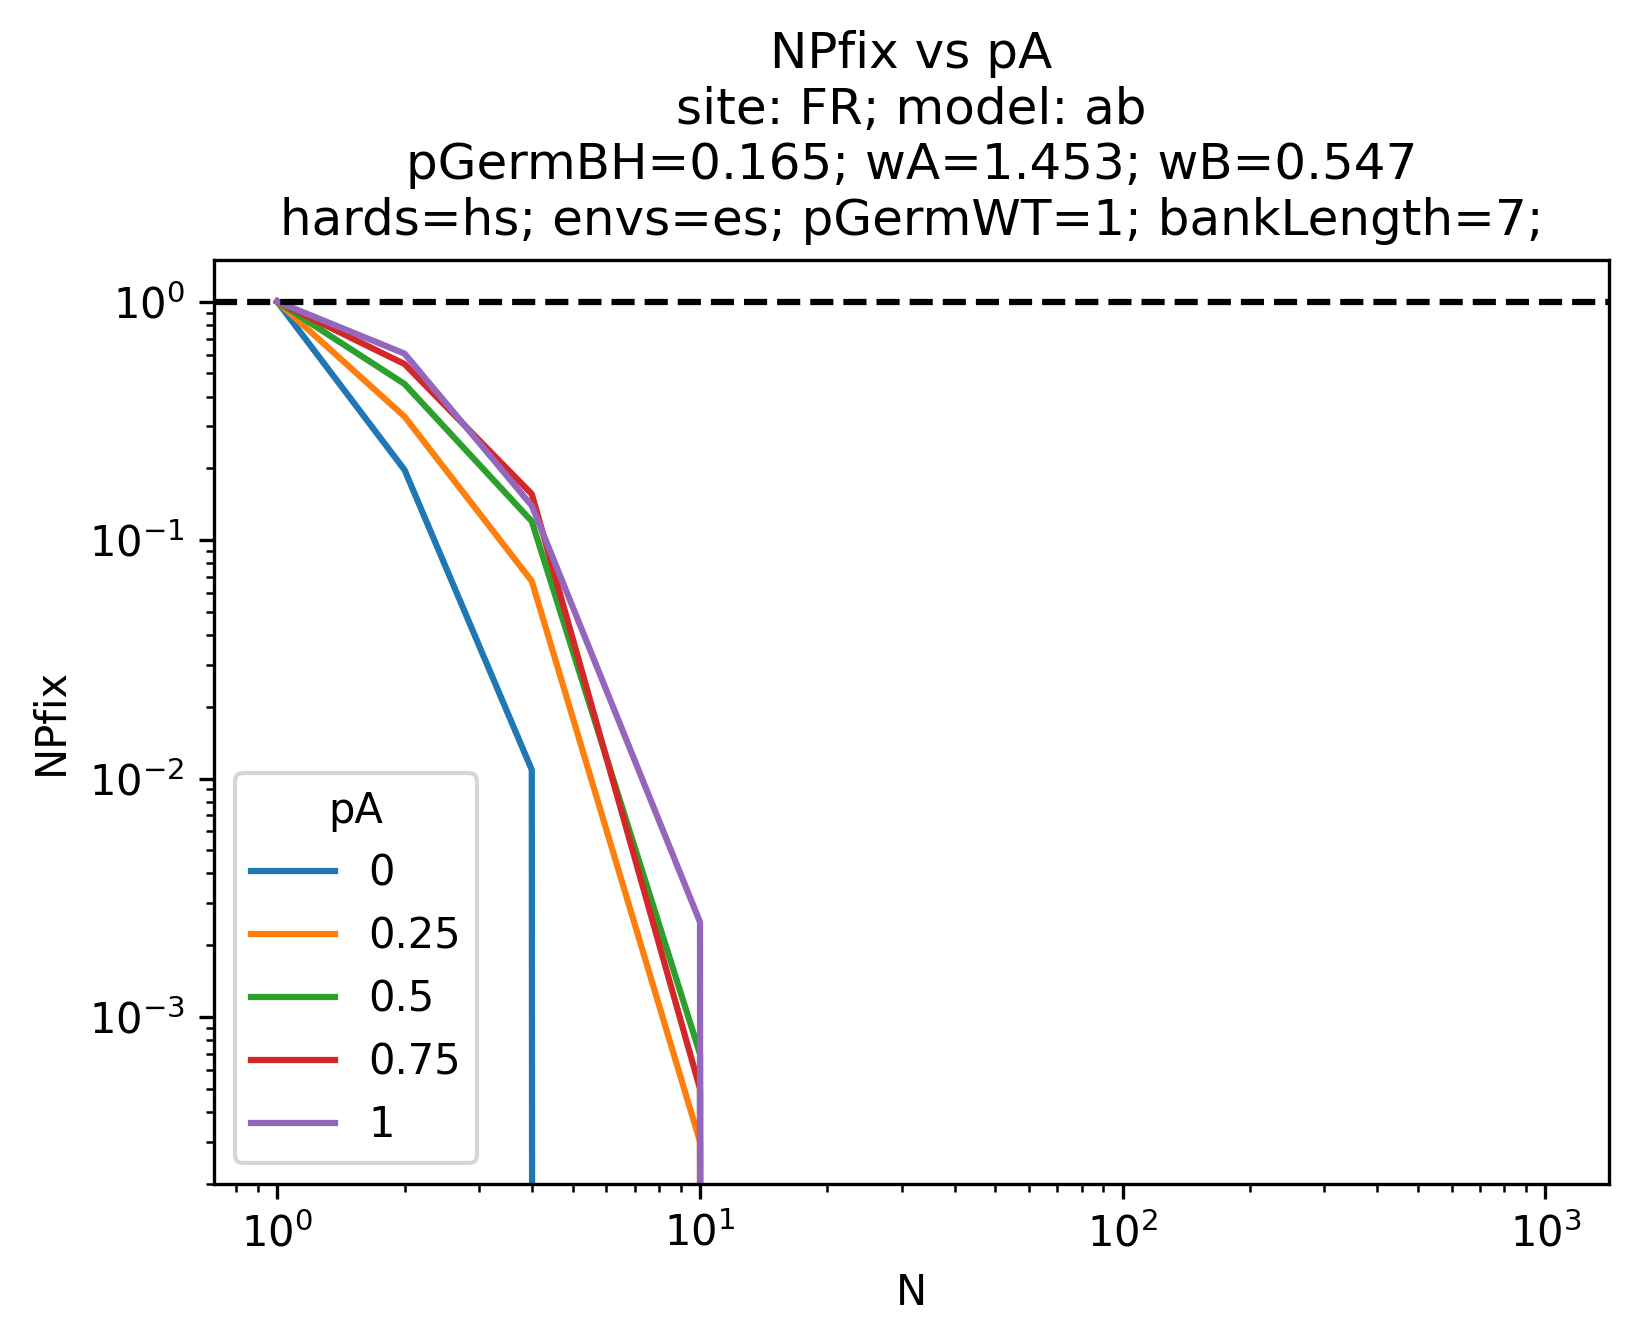

GCN_ab


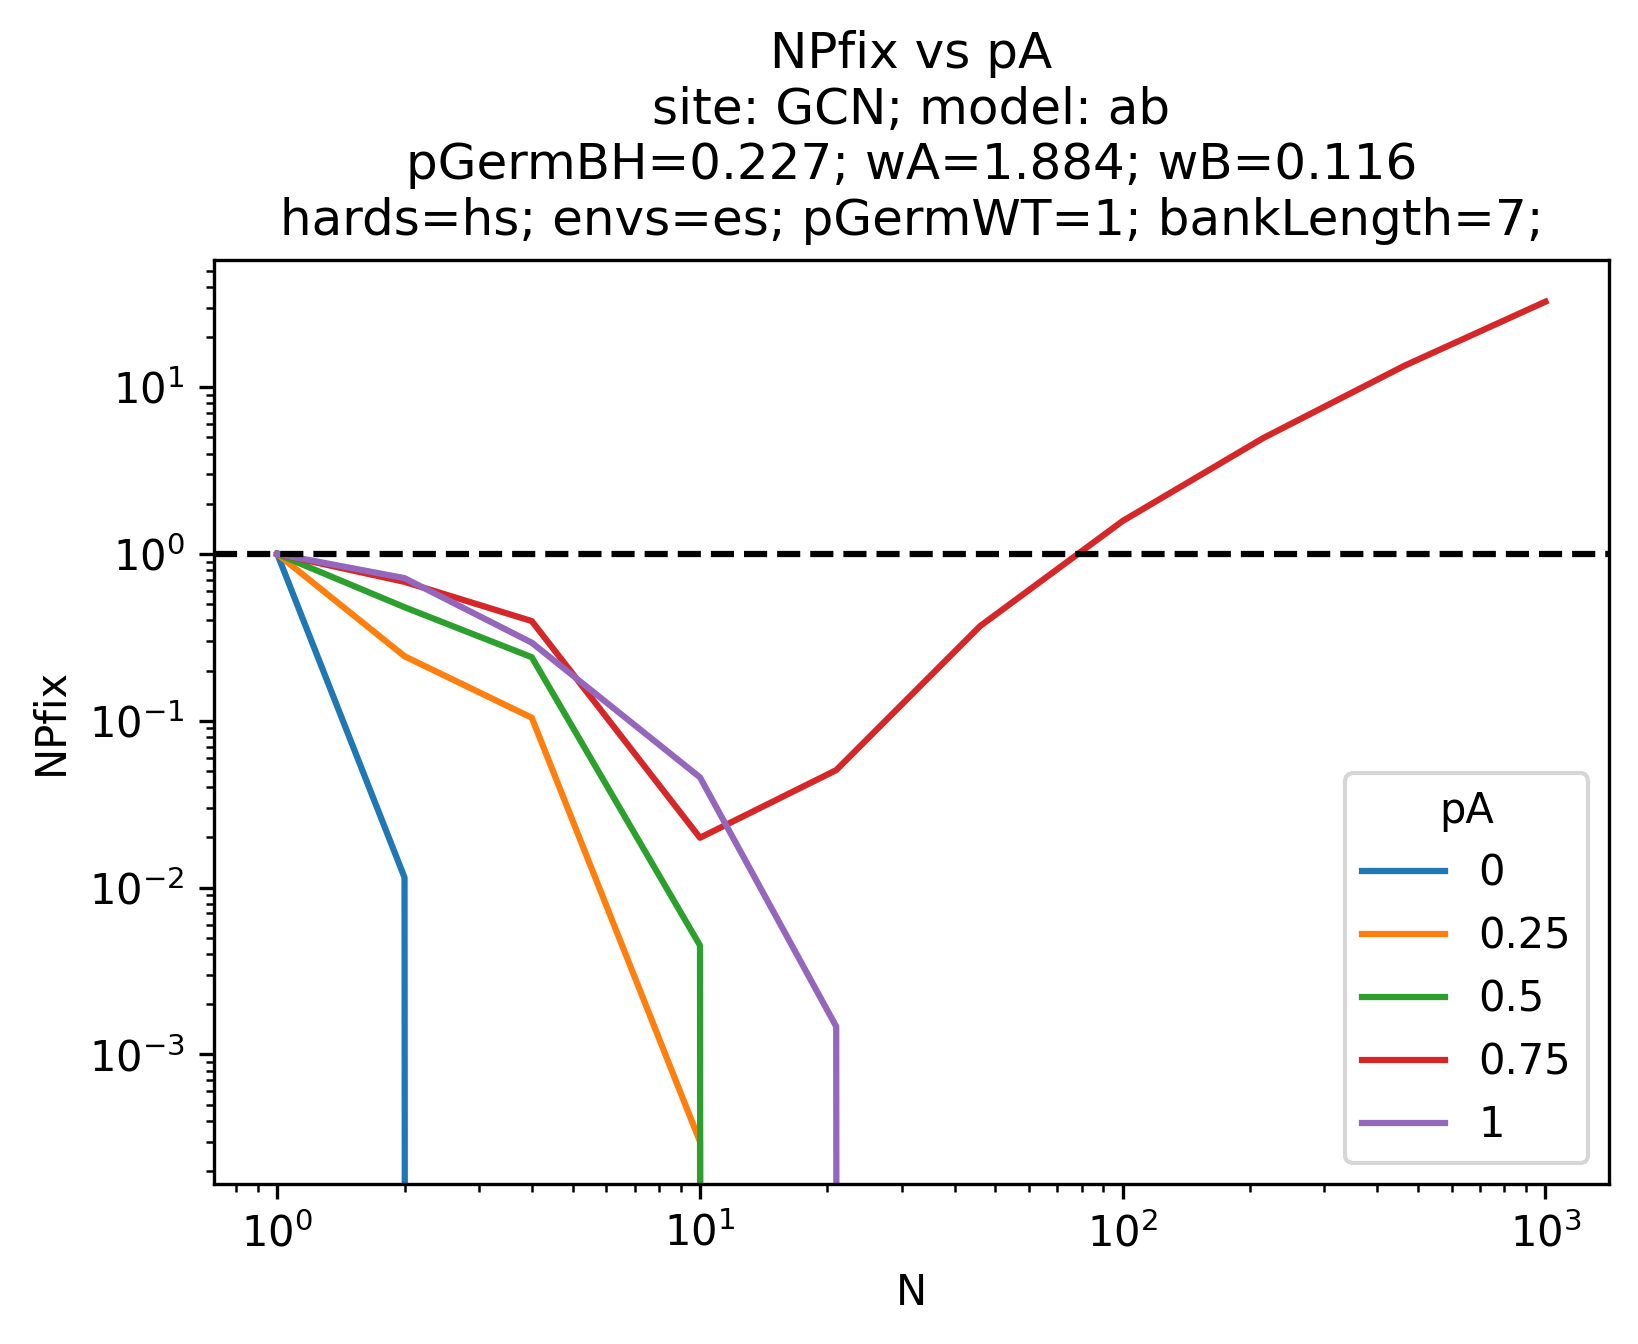

In [45]:
# Specify the site label and model type
model = 'ab'
for site in site_labels:
    print(site + '_' + model)
    plot_df = site_model_df_dict[site + '_' + model]
    all_params = param_dicts[site]
    # Specify the variables to filter on
    filter_params = {}
    if model == 'ab':
        filter_params = {
            'hards': 'hs', # [hs ss]
            'envs': 'es', # [es ed]
            # 'pA': 0.5, # [0 0.25 0.5 0.75 1]
            'pGermWT': 1, # [0.224 0.5 0.75 1]
            'bankLength': 7,  # [3 5 7]
        } 
    elif model == 'dist': 
        filter_params = {
            'hards': 'hs', # [hs ss]
            'fits': 'fs', # [fs fd]
            'pGermWT': 1, # [0.224 0.5 0.75 1]
            # 'bankLength': 7,  # [3 5 7]
        }
    plot_df = filter_df(plot_df, filter_params)
    params = filter_dict_by_model(all_params, filter_params, model)
    siegmund_params = f"pGermBH={ all_params['pGermBH'][0]}; wA={all_params['wA'][0]}; wB={all_params['wB'][0]}" if model == 'ab' else f"pGermBH={all_params['pGermBH'][0]}; fMean={all_params['fMean'][0]}; fVar={all_params['fVar'][0]}"
    for k, v in params.items():
        if k not in filter_params:
            plot_npfix(plot_df,
                    k, v,
                    f'NPfix_vs_{k}\n' +
                    f'site: {site}; model: {model}\n' + 
                    f'{siegmund_params}\n' + 
                    '_'.join([f'{k}={v};' for k, v in filter_params.items()]),
                    save=False)

In [22]:
plot_df

,N,NPfix,envs,germs,hards,pA,pGermBH,pGermWT,bankLength,wA,wB,site
